# Exploratory Data Analysis for Default Credit Card Dataset

Import packages.

In [9]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Read in data & inspect.

In [10]:
df = pd.read_csv('default.csv')
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Y
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [11]:
df.shape

(30000, 24)

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0
PAY_5,30000.0,-0.266200,1.133187,-2.0,-1.00,0.0,0.00,8.0


### 

Description of the Data.
* LIMIT_BAL: Amount of given credit in NT dollars
* SEX: Gender (1 = male, 2 = female)
* EDUCATION: Education level
    
    1 = graduate school

    2 = university

    3 = high school

    4 = others

    5, 6 = unknown
* MARRIAGE: Marital status (1 = married, 2 = single, 3 = others)
* AGE: Age in years
* PAY_0 to PAY_6: Repayment status from September to April 2005
    
    -1 = pay duly

    1 = payment delay for one month

    2 = payment delay for two months

    ...

    8 = delay for eight months

    9 = delay for nine months and above

* BILL_AMT1 to BILL_AMT6: Amount of bill statement from September to April 2005 (NT dollars)

* PAY_AMT1 to PAY_AMT6: Amount of previous payment from September to April 2005 (NT dollars)

* Y: Default payment (1 = yes, 0 = no)

In [53]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Remove duplicates
df = df.drop_duplicates()
print(f"Shape of dataframe after removing duplicates: {df.shape}")

Number of duplicate rows: 35
Shape of dataframe after removing duplicates: (29965, 24)


Histogram for all features.

array([[<Axes: title={'center': 'LIMIT_BAL'}>,
        <Axes: title={'center': 'SEX'}>,
        <Axes: title={'center': 'EDUCATION'}>,
        <Axes: title={'center': 'MARRIAGE'}>,
        <Axes: title={'center': 'AGE'}>],
       [<Axes: title={'center': 'PAY_0'}>,
        <Axes: title={'center': 'PAY_2'}>,
        <Axes: title={'center': 'PAY_3'}>,
        <Axes: title={'center': 'PAY_4'}>,
        <Axes: title={'center': 'PAY_5'}>],
       [<Axes: title={'center': 'PAY_6'}>,
        <Axes: title={'center': 'BILL_AMT1'}>,
        <Axes: title={'center': 'BILL_AMT2'}>,
        <Axes: title={'center': 'BILL_AMT3'}>,
        <Axes: title={'center': 'BILL_AMT4'}>],
       [<Axes: title={'center': 'BILL_AMT5'}>,
        <Axes: title={'center': 'BILL_AMT6'}>,
        <Axes: title={'center': 'PAY_AMT1'}>,
        <Axes: title={'center': 'PAY_AMT2'}>,
        <Axes: title={'center': 'PAY_AMT3'}>],
       [<Axes: title={'center': 'PAY_AMT4'}>,
        <Axes: title={'center': 'PAY_AMT5'}>,
    

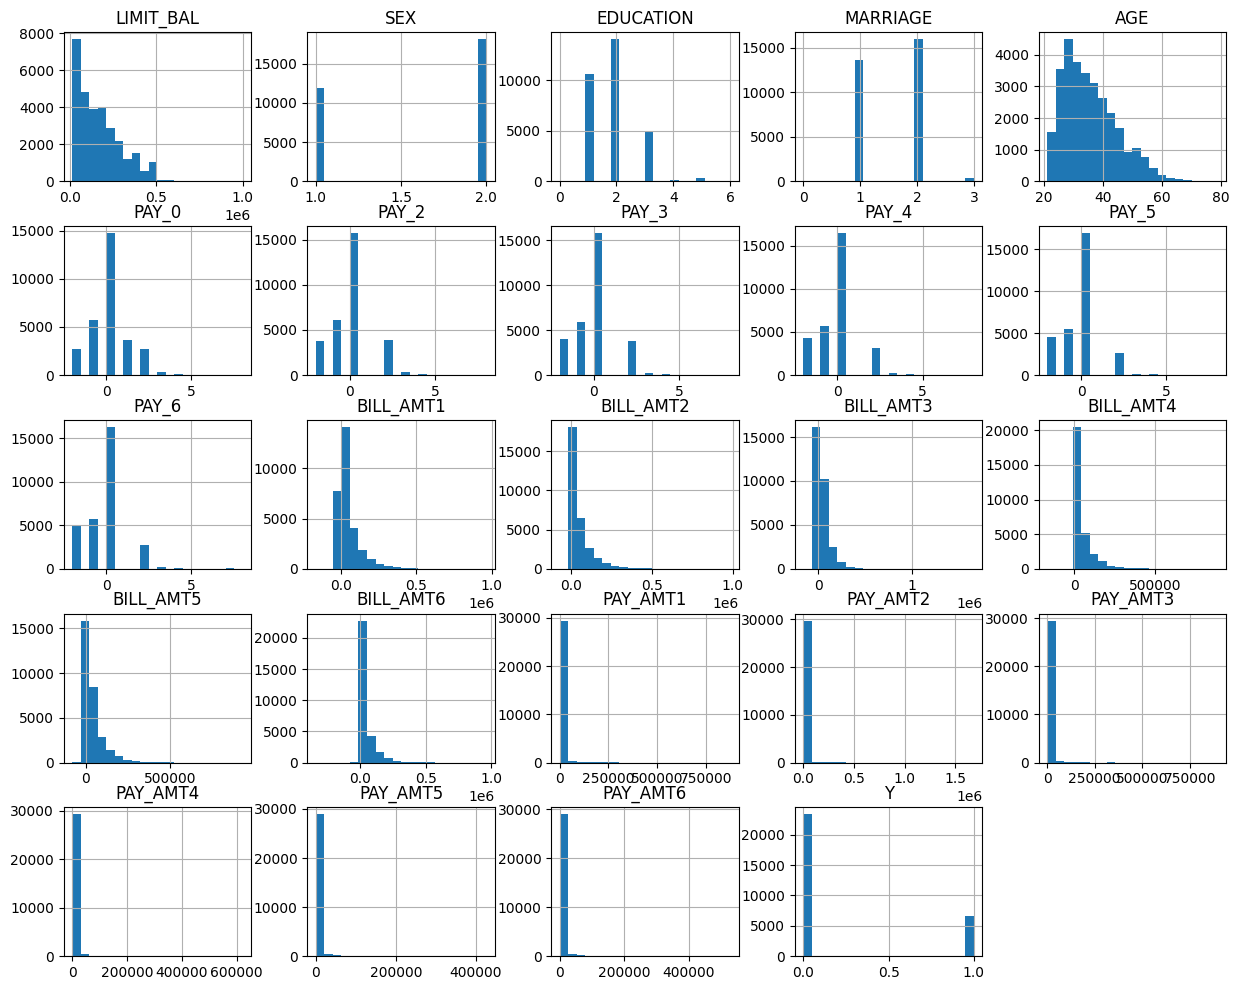

In [54]:
df.hist(bins=20, figsize = (15,12))

Traget variable distribution.

<Figure size 1000x600 with 0 Axes>

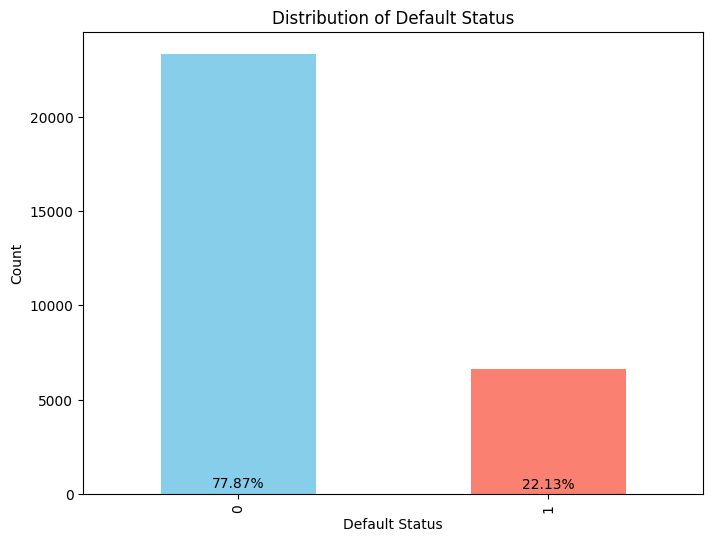

<Figure size 1000x600 with 0 Axes>

In [55]:
value_counts = df['Y'].value_counts()
total = value_counts.sum()
percentages = (value_counts / total) * 100

ax = value_counts.plot(kind='bar', figsize=(8, 6), color=['skyblue', 'salmon'])
for i, count in enumerate(percentages):
    ax.text(i, count+100, f"{count:.2f}%", ha='center', va='bottom')

plt.title("Distribution of Default Status")
plt.xlabel("Default Status")
plt.ylabel("Count")
plt.figure(figsize=(10, 6))


LIMIT_BAL and AGE Distribution by target.

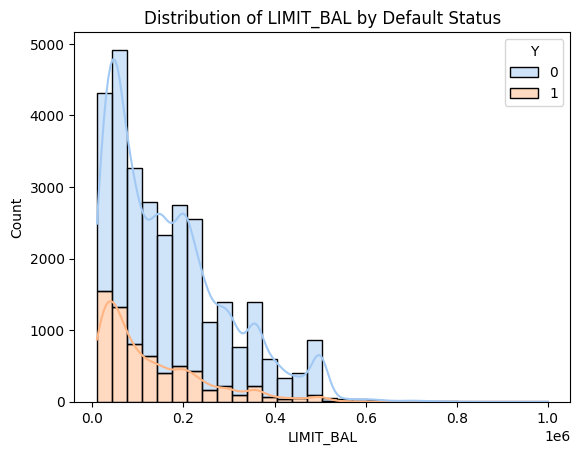

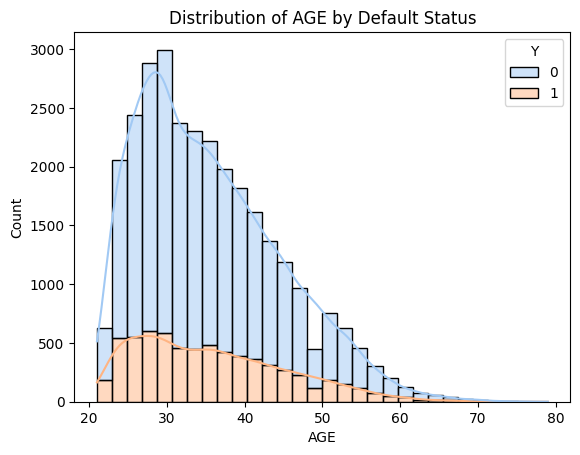

In [56]:
sns.histplot(data=df, x='LIMIT_BAL', hue='Y', multiple='stack', bins=30, palette='pastel', kde=True)
plt.title("Distribution of LIMIT_BAL by Default Status")
plt.xlabel("LIMIT_BAL")
plt.ylabel("Count")
plt.show()

sns.histplot(data=df, x='AGE', hue='Y', multiple='stack', bins=30, palette='pastel', kde=True)
plt.title("Distribution of AGE by Default Status")
plt.xlabel("AGE")
plt.ylabel("Count")
plt.show()